In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
fn='US_CrustVs_SLK_GRL_2015_UTAHtop5.csv'
vel=pd.read_csv(fn,header=0)


0 600


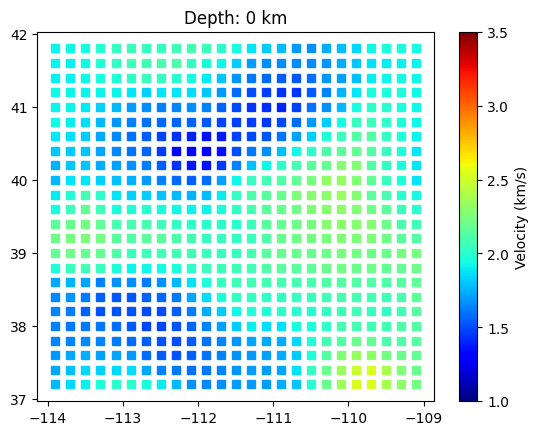

1 600


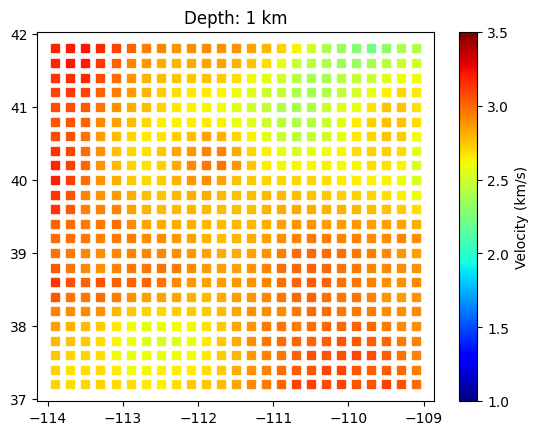

2 600


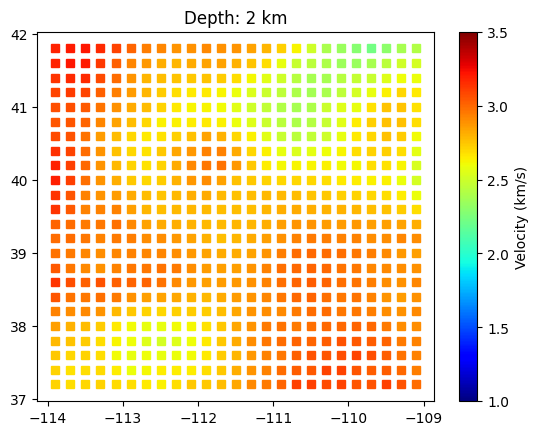

3 600


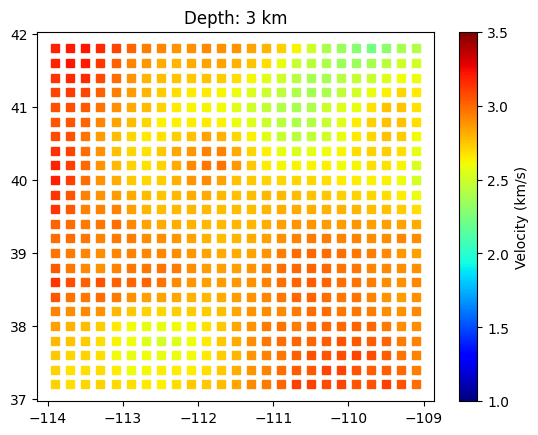

4 600


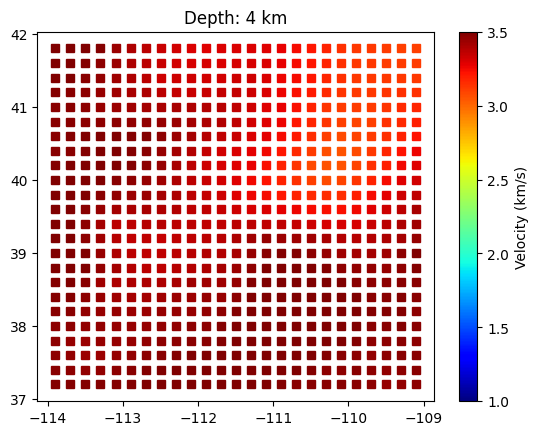

5 600


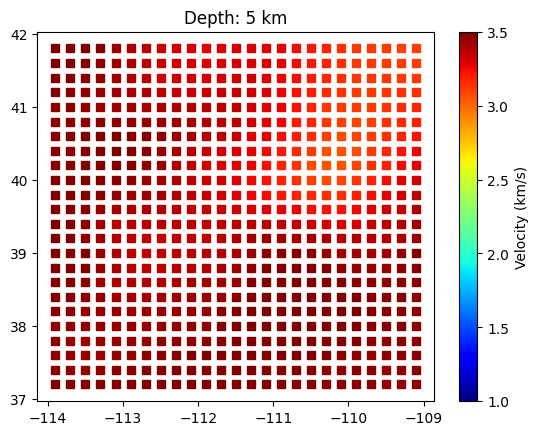

In [3]:

camp=plt.get_cmap('jet')
min_val, max_val = 1, 3.5  # Range from 0 to 5 km/s


# Create a scalar mappable to normalize the range with the colormap
norm = plt.Normalize(vmin=min_val, vmax=max_val)
sm = plt.cm.ScalarMappable(cmap=camp, norm=norm)
sm.set_array([])  # You can leave this empty as we only need it for the colorbar

for layer in vel.dep.unique():
    fig, ax = plt.subplots()
    data=vel[vel.dep==layer]
    print(layer, len(data))
    for stlo in data.lon.unique():
        line=data[data.lon==stlo]
        for stla in data[data.lon==stlo].lat.unique():
            Vs=line[line.lat==stla].Vs.values
            color=camp(norm(Vs))
            plt.plot(stlo, stla,color=color, marker='s')
            plt.title('Depth: '+str(layer)+' km')
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label("Velocity (km/s)")

    plt.show()

In [4]:
#---Read  data---# 
fn= "./UU_sta.csv"
fi2=pd.read_csv(fn, sep=',',header=0)
dfloc=pd.DataFrame(fi2)
print(dfloc)


     stnm      stlo     stla    elev  Unnamed: 4
0     BGU -113.0300  40.9210  1640.0         NaN
1    BRPU -110.7400  39.4730  1687.0         NaN
2    BSUT -110.7610  40.5360  3211.0         NaN
3     CTU -111.7500  40.6930  1731.0         NaN
4    CVRU -111.1720  38.9180  1912.0         NaN
5     DUG -112.8133  40.1950  1477.0         NaN
6    FOR1 -113.0940  38.3690  1642.0         NaN
7    FORU -112.8610  38.4590  1840.0         NaN
8     HMU -110.7420  37.9380  2430.0         NaN
9    HVU1 -112.7750  41.7800  1609.0         NaN
10   HVU2 -112.7750  41.7800  1609.0         NaN
11   HWUT -111.5652  41.6069  1830.0         NaN
12    JLU -111.4500  40.6020  2285.0         NaN
13   LCMT -113.2440  37.0120  1411.0         NaN
14   LIUT -110.3250  39.4240  2178.0         NaN
15    MPU -111.6330  40.0160  1909.0         NaN
16   MTPU -112.1840  38.0410  3112.0         NaN
17    NLU -112.0750  39.9550  2036.0         NaN
18    NOQ -112.1200  40.6530  1622.0         NaN
19   PNSU -110.2460 

In [5]:
import math

# Function to calculate Euclidean distance between two points
def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Function to find the nearest point in a list of points to a given point
def find_nearest_point(points, target_point):
    min_distance = float('inf')  # Initialize with positive infinity
    nearest_point = None

    for point in points:
        distance = calculate_distance(target_point, point)
        if distance < min_distance:
            min_distance = distance
            nearest_point = point

    return nearest_point



(3600, 2) (30, 9)
       lon   lat  dep    Vs
690 -113.1  41.0    0  1.77
691 -113.1  41.0    1  2.89
692 -113.1  41.0    2  2.89
693 -113.1  41.0    3  2.89
694 -113.1  41.0    4  3.44
695 -113.1  41.0    5  3.44
        lon   lat  dep    Vs
2370 -110.7  39.4    0  2.21
2371 -110.7  39.4    1  2.88
2372 -110.7  39.4    2  2.88
2373 -110.7  39.4    3  2.88
2374 -110.7  39.4    4  3.35
2375 -110.7  39.4    5  3.35
        lon   lat  dep    Vs
2406 -110.7  40.6    0  1.71
2407 -110.7  40.6    1  2.44
2408 -110.7  40.6    2  2.44
2409 -110.7  40.6    3  2.44
2410 -110.7  40.6    4  3.20
2411 -110.7  40.6    5  3.20
        lon   lat  dep    Vs
1686 -111.7  40.6    0  1.38
1687 -111.7  40.6    1  2.80
1688 -111.7  40.6    2  2.80
1689 -111.7  40.6    3  2.80
1690 -111.7  40.6    4  3.36
1691 -111.7  40.6    5  3.36
        lon   lat  dep    Vs
2070 -111.1  39.0    0  2.15
2071 -111.1  39.0    1  2.88
2072 -111.1  39.0    2  2.88
2073 -111.1  39.0    3  2.88
2074 -111.1  39.0    4  3.48
207

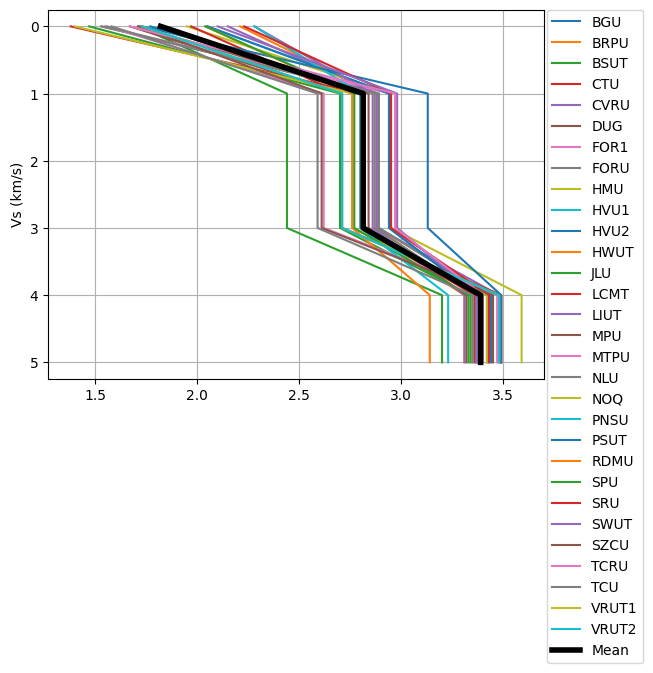

In [6]:

# List of points in 2D space
points=np.zeros(shape=(len(vel.lon),2))
near_points=np.zeros((len(dfloc.stlo),3+6))
print(points.shape, near_points.shape)
dep=vel.dep.unique()



for x in range(len(vel.lon)):
    points[x,0] = vel.lon[x]
    points[x,1] = vel.lat[x]
#print(points) 
fig=plt.figure()
for k in range(len(dfloc.stlo)):
    # Given point
    target_point = (dfloc.stlo[k],dfloc.stla[k])
    
    # Find the nearest point
    nearest = find_nearest_point(points, target_point)
    near_points[k,0]=nearest[0]
    near_points[k,1]=nearest[1] 

    # Use boolean indexing to find matching indices in df_vs30
    matching_indices = (vel[(vel.lon == nearest[0]) & (vel.lat == nearest[1])])
    print(matching_indices)
    plt.plot(matching_indices.Vs,dep ,label=f'{dfloc.stnm[k]}')
    for idx, vs in enumerate(matching_indices.Vs.values[:]):
        near_points[k,2+idx]=vs
    
    #print(f"The nearest point to {target_point} is {nearest}")
dfloc["nearest_lon"]=near_points[:,0]
dfloc["nearest_lat"]=near_points[:,1]
dfloc["Vs_0"]=near_points[:,2]
dfloc["Vs_1"]=near_points[:,3]
dfloc["Vs_2"]=near_points[:,4]
dfloc["Vs_3"]=near_points[:,5]
dfloc["Vs_4"]=near_points[:,6]
dfloc["Vs_5"]=near_points[:,7]
mean_vel=[np.mean(near_points[:,x]) for x in range(2,8)]

plt.plot(mean_vel,dep, label='Mean', linewidth=4, color='black')
plt.ylabel('Vs (km/s)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0.)
plt.show()


In [7]:
print(mean_vel)

[1.8203333333333331, 2.8136666666666668, 2.8136666666666668, 2.8136666666666668, 3.389333333333334, 3.389333333333334]


[0.0500, 3.15, 1.82, 2.0],
[0.0500, 3.23, 1.87, 2.0],
[0.0500, 3.32, 1.92, 2.0],
[0.0500, 3.40, 1.97, 2.0],
[0.0500, 3.49, 2.02, 2.0],
[0.0500, 3.57, 2.07, 2.0],
[0.0500, 3.66, 2.12, 2.0],
[0.0500, 3.75, 2.17, 2.0],
[0.0500, 3.83, 2.22, 2.0],
[0.0500, 3.92, 2.27, 2.0],
[0.0500, 4.00, 2.32, 2.0],
[0.0500, 4.09, 2.37, 2.0],
[0.0500, 4.18, 2.42, 2.0],
[0.0500, 4.26, 2.47, 2.0],
[0.0500, 4.35, 2.52, 2.0],
[0.0500, 4.43, 2.57, 2.0],
[0.0500, 4.52, 2.62, 2.0],
[0.0500, 4.60, 2.66, 2.0],
[0.0500, 4.69, 2.71, 2.0],
[0.0500, 4.78, 2.76, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[

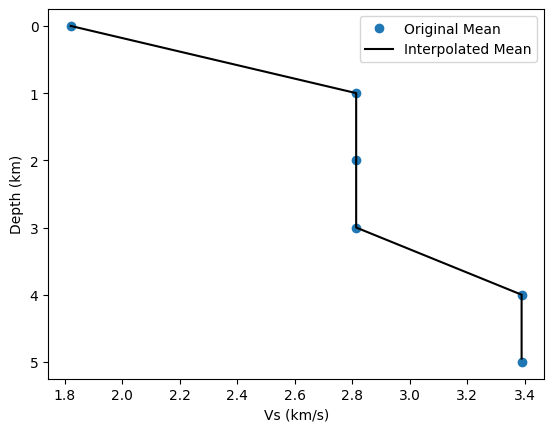

In [8]:
from scipy.interpolate import interp1d

# Assuming you have arrays 'depths' and 'mean_vel' for depth and average velocity
# Replace these arrays with your actual data
depths = dep
depth_interval=0.05

# Define the interpolation function
f = interp1d(depths, mean_vel, kind='linear')

# Define new depth values with interval of 0.05
depths_new = np.arange(depths.min(), depths.max(), depth_interval)
mean_vel_interp = f(depths_new)

# Create the velocity model array in the desired format
velocity_model = np.array([
    [depth_interval, vel * 1.728, vel, 2.0] for vel in mean_vel_interp
])

# Print the formatted array with commas
for row in velocity_model:
    print(f"[{row[0]:.4f}, {row[1]:.2f}, {row[2]:.2f}, {row[3]:.1f}],")
    
# Plot the original and interpolated data
plt.plot(mean_vel, depths, 'o', label='Original Mean')
plt.plot(mean_vel_interp, depths_new, '-', label='Interpolated Mean', color='black')
plt.gca().invert_yaxis()
plt.xlabel("Vs (km/s)")
plt.ylabel("Depth (km)")
plt.legend()
plt.show()


In [9]:
dfloc.to_csv('UU_sta_Vs.csv',index=False)